<a href="https://colab.research.google.com/github/s13998/inl_projekt/blob/main/inl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [2]:
train = pd.read_csv('olid-training-v1.0.tsv', sep='\t')
train.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [3]:
test_a = pd.read_csv('testset-levela.tsv', sep='\t')
test_la = pd.read_csv('labels-levela.csv',names=["id","label"])

test_b = pd.read_csv('testset-levelb.tsv', sep='\t')
test_lb = pd.read_csv('labels-levelb.csv',names=["id","label"])

In [4]:
test_tweet_a = test_a.pop('tweet')
test_label_a = test_la.pop('label')

test_tweet_b = test_b.pop('tweet')
test_label_b = test_lb.pop('label')

In [5]:
features_a = train.copy()
labels_a = features_a.pop('subtask_a')
data_a = features_a.pop('tweet')

In [6]:
features_b = train.copy()
features_b = features_b.drop(features_b[features_b.subtask_b != features_b.subtask_b].index)
features_b = features_b.reset_index(drop=True)

labels_b = features_b.pop('subtask_b')
data_b = features_b.pop('tweet')

In [7]:
#22418
VOCAB_SIZE = 20000
encoder_a = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder_a.adapt(data_a.values)

vocab_a = np.array(encoder_a.get_vocabulary())
vocab_a[:20]

array(['', '[UNK]', 'user', 'the', 'is', 'to', 'a', 'and', 'you', 'of',
       'are', 'i', 'he', 'in', 'that', 'for', 'she', 'url', 'it', 'this'],
      dtype='<U62')

In [8]:
encoded_example_a = encoder_a(data_a.values).numpy()
print(encoded_example_a)

[[    2    16    81 ...     0     0     0]
 [    2     2    89 ...     0     0     0]
 [ 4251     4  8005 ...     0     0     0]
 ...
 [    2     7    67 ...     0     0     0]
 [    2  1064     0 ...     0     0     0]
 [12266   793   501 ...     0     0     0]]


In [9]:
for n in range(5):
  print("Original: ", data_a[n])
  print("Round-trip: ", " ".join(vocab_a[encoded_example_a[n]]))
  print()

Original:  @USER She should ask a few native Americans what their take on this is.
Round-trip:  user she should ask a few native americans what their take on this is                                                                                         

Original:  @USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL
Round-trip:  user user go home you’re drunk user maga trump2020 👊🇺🇸👊 url                                                                                            

Original:  Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT
Round-trip:  amazon is investigating chinese employees who are selling internal data to thirdparty sellers looking for an edge in the competitive marketplace url amazon maga kag china tcot                                                                            

Original:  @USER Someone should'veTaken

In [10]:
VOCAB_SIZE = 10000
encoder_b = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder_b.adapt(data_b.values)

vocab_b = np.array(encoder_b.get_vocabulary())
vocab_b[:20]

array(['', '[UNK]', 'user', 'the', 'is', 'to', 'a', 'and', 'you', 'of',
       'are', 'that', 'he', 'i', 'in', 'for', 'she', 'this', 'it', 'they'],
      dtype='<U41')

In [11]:
encoded_example_b = encoder_b(data_b.values).numpy()
print(encoded_example_b[0])

[   2   16   81  565    6  653 1858  248   33   50  135   21   17    4
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


In [12]:
for n in range(5):
  print("Original: ", data_b[n])
  print("Round-trip: ", " ".join(vocab_b[encoded_example_b[n]]))
  print()

Original:  @USER She should ask a few native Americans what their take on this is.
Round-trip:  user she should ask a few native americans what their take on this is                                                                                       

Original:  @USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL
Round-trip:  user user go home you’re drunk user maga trump2020 👊🇺🇸👊 url                                                                                          

Original:  @USER Someone should'veTaken" this piece of shit to a volcano. 😂"
Round-trip:  user someone shouldvetaken this piece of shit to a volcano 😂                                                                                          

Original:  @USER Liberals are all Kookoo !!!
Round-trip:  user liberals are all kookoo                                                                                                

Original:  @USER @USER Oh noes! Tough shit.
Round-trip:  user user oh noes to

In [13]:
labele_a=[]
for i in labels_a.keys():
  if(labels_a[i]=='NOT'):
    labele_a.append(0)
  elif(labels_a[i]=='OFF'):
    labele_a.append(1)
  else:
    print(labels_a[i])

In [14]:
test_labele_a=[]
c=0
for i in range(len(test_label_a)):
  if(test_label_a[i]=='NOT'):
    test_labele_a.append(0)
  elif(test_label_a[i]=='OFF'):
    test_labele_a.append(1)
  else:
    print(test_label_a[i])

In [15]:
labele_b=[]
for i in labels_b.keys():
  if(labels_b[i]=='TIN'):
    labele_b.append(1)
  elif(labels_b[i]=='UNT'):
    labele_b.append(0)
  else:
    print(labels_b[i])

In [16]:
test_labele_b=[]

for i in test_label_b.keys():
  if(test_label_b[i]=='TIN'):
    test_labele_b.append(1)
  elif(test_label_b[i]=='UNT'):
    test_labele_b.append(0)
  else:
    print(test_label_b[i])

In [17]:
model_a = tf.keras.Sequential([
    encoder_a,
    tf.keras.layers.Embedding(
        input_dim=len(encoder_a.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


In [18]:
model_a.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [19]:
history_a = model_a.fit(data_a, np.array(labele_a), epochs=10, initial_epoch=0, batch_size=100, 
                    validation_data=(test_tweet_a,np.array(test_labele_a)))

Epoch 1/10
133/133 [==============================] - 16s 39ms/step - loss: 0.6709 - accuracy: 0.6432 - val_loss: 0.6182 - val_accuracy: 0.7209
Epoch 2/10
133/133 [==============================] - 4s 32ms/step - loss: 0.6441 - accuracy: 0.6634 - val_loss: 0.6044 - val_accuracy: 0.7209
Epoch 3/10
133/133 [==============================] - 4s 32ms/step - loss: 0.6337 - accuracy: 0.6664 - val_loss: 0.5937 - val_accuracy: 0.7209
Epoch 4/10
133/133 [==============================] - 4s 32ms/step - loss: 0.6233 - accuracy: 0.6704 - val_loss: 0.5643 - val_accuracy: 0.7209
Epoch 5/10
133/133 [==============================] - 4s 32ms/step - loss: 0.5952 - accuracy: 0.6909 - val_loss: 0.5380 - val_accuracy: 0.7651
Epoch 6/10
133/133 [==============================] - 4s 32ms/step - loss: 0.5569 - accuracy: 0.7461 - val_loss: 0.5039 - val_accuracy: 0.7709
Epoch 7/10
133/133 [==============================] - 4s 32ms/step - loss: 0.5045 - accuracy: 0.7912 - val_loss: 0.4859 - val_accuracy: 0.784

In [20]:
model_b = tf.keras.Sequential([
    encoder_b,
    tf.keras.layers.Embedding(
        input_dim=len(encoder_b.get_vocabulary()),
        output_dim=100,
        #input_length=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [21]:
model_b.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [22]:
history_b = model_b.fit(data_b, np.array(labele_b), epochs=10, initial_epoch=0, batch_size=100, 
                    validation_data=(test_tweet_b,np.array(test_labele_b)))

Epoch 1/10
44/44 [==============================] - 7s 63ms/step - loss: 0.6892 - accuracy: 0.6118 - val_loss: 0.6746 - val_accuracy: 0.8875
Epoch 2/10
44/44 [==============================] - 1s 23ms/step - loss: 0.6491 - accuracy: 0.8348 - val_loss: 0.5478 - val_accuracy: 0.8875
Epoch 3/10
44/44 [==============================] - 1s 23ms/step - loss: 0.4972 - accuracy: 0.8525 - val_loss: 0.3698 - val_accuracy: 0.8875
Epoch 4/10
44/44 [==============================] - 1s 22ms/step - loss: 0.4681 - accuracy: 0.8648 - val_loss: 0.3605 - val_accuracy: 0.8875
Epoch 5/10
44/44 [==============================] - 1s 22ms/step - loss: 0.4529 - accuracy: 0.8723 - val_loss: 0.3495 - val_accuracy: 0.8875
Epoch 6/10
44/44 [==============================] - 1s 22ms/step - loss: 0.4445 - accuracy: 0.8773 - val_loss: 0.3420 - val_accuracy: 0.8875
Epoch 7/10
44/44 [==============================] - 1s 22ms/step - loss: 0.4321 - accuracy: 0.8764 - val_loss: 0.3393 - val_accuracy: 0.8875
Epoch 8/10
44

In [23]:
tmp=model_a.predict(data_a[0:10])

for i in range(10):
  print(tmp[i],' -> ',labele_a[i])


[0.302]  ->  1
[0.471]  ->  1
[0.008]  ->  0
[0.923]  ->  1
[0.203]  ->  0
[0.36]  ->  1
[0.69]  ->  1
[0.794]  ->  1
[0.313]  ->  0
[0.784]  ->  1


In [24]:
tmp=model_a.predict(test_tweet_a[0:10])

for i in range(10):
  print(tmp[i],' -> ',test_labele_a[i])

[0.805]  ->  1
[0.058]  ->  0
[0.037]  ->  0
[0.031]  ->  0
[0.021]  ->  1
[0.803]  ->  1
[0.061]  ->  0
[0.084]  ->  1
[0.015]  ->  0
[0.146]  ->  0


In [25]:
tmp=model_b.predict(data_b[0:10])

for i in range(10):
  print(tmp[i],' -> ',labele_b[i])

[0.86]  ->  0
[0.85]  ->  1
[0.777]  ->  0
[0.697]  ->  1
[0.677]  ->  0
[0.895]  ->  1
[0.88]  ->  1
[0.895]  ->  1
[0.889]  ->  1
[0.899]  ->  1


In [26]:
tmp=model_b.predict(test_tweet_b[0:20])

for i in range(20):
  print(tmp[i],' -> ',test_labele_b[i])

[0.899]  ->  1
[0.877]  ->  1
[0.693]  ->  1
[0.898]  ->  1
[0.675]  ->  0
[0.838]  ->  1
[0.898]  ->  1
[0.897]  ->  1
[0.809]  ->  1
[0.892]  ->  1
[0.87]  ->  1
[0.564]  ->  0
[0.898]  ->  1
[0.682]  ->  1
[0.886]  ->  0
[0.898]  ->  1
[0.596]  ->  1
[0.901]  ->  1
[0.896]  ->  1
[0.897]  ->  1


In [27]:
tmp=model_a.predict(test_tweet_a)
tp=1
fp=1
tn=1
fn=1
for i in range(len(tmp)):
  if tmp[i]<0.5:
    if test_labele_a[i]==0:
      tn=tn+1
    else:
      fn=fn+1
  else:
    if test_labele_a[i]==1:
      tp=tp+1
    else:
      fp=fp+1


precisionA = tp/(tp+fp)
precisionB = tn/(tn+fn)

recallA = tp/(tp+fn)
recallB = tn/(tn+fp)

print('precision 1:',precisionA)
print('precision 0:',precisionB)
print('recall 1:',recallA)
print('recall 0:',recallB)

f1A=2*precisionA*recallA/(precisionA+recallA)
f1B=2*precisionB*recallB/(precisionB+recallB)

print('f1 1:',f1A)
print('f1 0:',f1B)

precision 1: 0.7727272727272727
precision 0: 0.8087431693989071
recall 1: 0.4214876033057851
recall 0: 0.9517684887459807
f1 1: 0.5454545454545454
f1 0: 0.8744460856720828


In [28]:
tmp=model_b.predict(test_tweet_b)
tp=1
fp=1
tn=1
fn=1
for i in range(len(tmp)):
  if tmp[i]<0.5:
    if test_labele_b[i]==0:
      tn=tn+1
    else:
      fn=fn+1
  else:
    if test_labele_b[i]==1:
      tp=tp+1
    else:
      fp=fp+1


precisionA = tp/(tp+fp)
precisionB = tn/(tn+fn)

recallA = tp/(tp+fn)
recallB = tn/(tn+fp)

print('precision 1:',precisionA)
print('precision 0:',precisionB)
print('recall 1:',recallA)
print('recall 0:',recallB)

f1A=2*precisionA*recallA/(precisionA+recallA)
f1B=2*precisionB*recallB/(precisionB+recallB)

print('f1 1:',f1A)
print('f1 0:',f1B)

precision 1: 0.8842975206611571
precision 0: 0.5
recall 1: 0.9953488372093023
recall 0: 0.034482758620689655
f1 1: 0.9365426695842451
f1 0: 0.06451612903225806


(0.0, 0.6847805455327034)

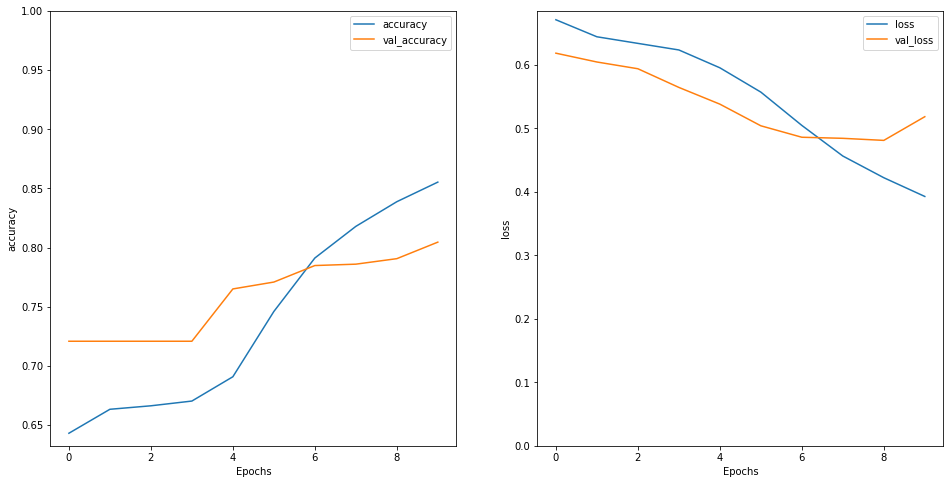

In [29]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_a, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_a, 'loss')
plt.ylim(0, None)

(0.0, 0.707343477010727)

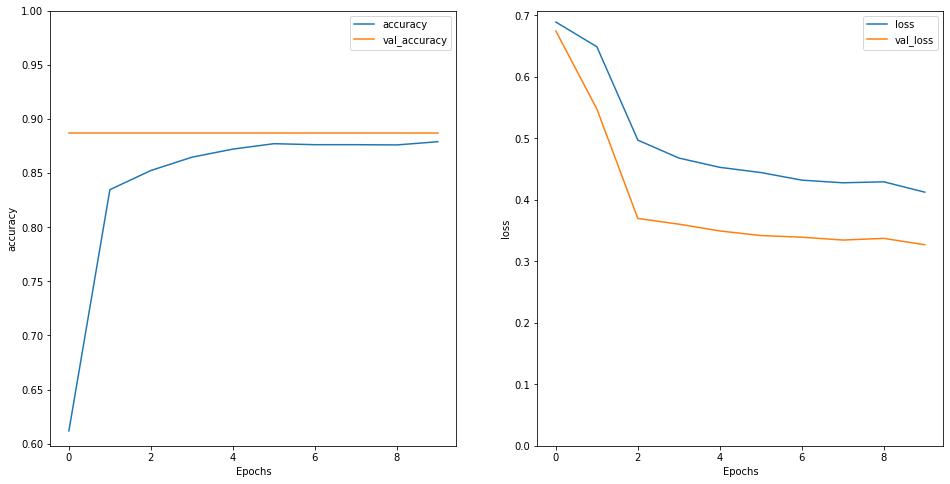

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_b, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_b, 'loss')
plt.ylim(0, None)